# **Proyek Predictive Analytics: [Mempredikasi Harga Sewa Properti di New York City]**

Domain proyek yang diambil, yaitu Ekonomi dan Bisnis, yang terfokus pada Memprediksi Harga Optimal Properti di platform Airbnb New York City.

Dalam beberapa tahun terakhir, platform berbagi properti seperti Airbnb telah mengalami pertumbuhan yang pesat, terutama di kota-kota besar seperti New York City. Salah satu tantangan utama yang dihadapi oleh tuan rumah (host) di Airbnb adalah menentukan harga optimal untuk properti mereka. Harga yang terlalu tinggi dapat menyebabkan berkurangnya penyewaan, sementara harga yang terlalu rendah dapat mengurangi potensi pendapatan. Situasi ini diperparah oleh faktor-faktor eksternal seperti musim, lokasi, fasilitas properti, dan permintaan pasar.

Model predictive analytics dapat digunakan untuk memprediksi harga optimal berdasarkan data historis dan fitur-fitur terkait. Dengan prediksi yang akurat, host dapat menyesuaikan harga properti mereka secara dinamis untuk memaksimalkan pendapatan sambil tetap kompetitif di pasar.

Mengapa Masalah Ini Harus Diselesaikan:
Mengoptimalkan harga properti di platform Airbnb sangat penting bagi tuan rumah untuk mencapai keseimbangan antara tingkat hunian yang tinggi dan pendapatan maksimal. Keputusan penetapan harga yang tidak tepat dapat menyebabkan hilangnya peluang pendapatan atau bahkan kerugian finansial.

Hasil Riset Terkait:

*   Kalehbasti, P. R., Nikolenko, L., & Rezae, H. (2021). Airbnb price prediction using machine learning and sentiment analysis. In A. Holzinger et al. Vol. LNCS 12844, pp. 173–184.

## 2. Business Understanding
### Problem Statements:
- **Pernyataan Masalah 1**:
  Bagaimana menentukan harga optimal untuk properti Airbnb di New York City berdasarkan data historis dan fitur properti?
- **Pernyataan Masalah 2**:
  Bagaimana pengaruh fitur-fitur seperti lokasi, jumlah kamar, dan fasilitas terhadap harga properti?

### Goals:
- Mengembangkan model machine learning yang dapat memprediksi harga properti berdasarkan data historis.
- Mengidentifikasi fitur-fitur yang paling berpengaruh dalam penetapan harga properti Airbnb.

### Solution Statements:
1.   Menggunakan tiga algoritma berbeda:
*   K-Nearest Neighbor (KNN)
*   Random Forest
*   AdaBoost
2.  Melakukan hyperparameter tuning (GridSearch) pada model yang terpilih untuk meningkatkan akurasi prediksi.

## 3. Data Understanding
### Informasi Data:
Dataset yang digunakan dalam proyek ini adalah "New York City Airbnb Open Data" yang diunduh dari Kaggle. Dataset ini mencakup informasi mengenai listing properti di Airbnb di New York City, termasuk harga, lokasi, jumlah kamar, dan fasilitas.

#### Informasi Mengenai Dataset:
- **Nama Dataset**: New York City Airbnb Open Data
- **Sumber**: [Kaggle](https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data)
- **Ukuran Dataset**: 49.5 MB (CSV format)
- **Jumlah Baris (Data Points)**: 48,895 baris
- **Jumlah Kolom (Fitur)**: 16 kolom

#### Variabel dalam Dataset:
- `id`: Identifikasi unik untuk setiap listing.
- `name`: Nama dari listing yang diposting oleh pemilik.
- `host_id`: Identifikasi unik untuk setiap pemilik (host).
- `host_name`: Nama dari pemilik listing.
- `neighbourhood_group`: Wilayah besar atau borough di New York City (misalnya: Manhattan, Brooklyn).
- `neighbourhood`: Nama spesifik dari lingkungan atau area.
- `latitude`: Latitude dari lokasi listing.
- `longitude`: Longitude dari lokasi listing.
- `room_type`: Jenis ruangan yang disewakan (misalnya: entire home/apt, private room).
- `price`: Harga per malam untuk listing (dalam USD).
- `minimum_nights`: Jumlah minimum malam yang harus dipesan oleh tamu.
- `number_of_reviews`: Jumlah ulasan yang diterima oleh listing.
- `last_review`: Tanggal ulasan terakhir yang diterima oleh listing.
- `reviews_per_month`: Rata-rata ulasan per bulan.
- `calculated_host_listings_count`: Jumlah listing aktif yang dimiliki oleh host.
- `availability_365`: Jumlah hari listing tersedia dalam setahun.

#### Kondisi Data:
- **Missing Values**: Ada beberapa kolom dengan nilai yang hilang, seperti `last_review` dan `reviews_per_month`.
- **Outliers**: Terdapat kemungkinan adanya outliers terutama dalam kolom `price` dan `minimum_nights`.
- **Data Format**: Sebagian besar kolom berisi data kategorikal atau numerik sederhana, namun beberapa kolom seperti `last_review` berisi data tanggal yang memerlukan pemrosesan tambahan (Transformasi Fitur).

# Data Loading

In [ ]:
from google.colab import files
files.upload()

Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1) (2).json': b'{"username":"thecharolintan","key":"1b77ccf4432c0fd97eabe55e6fb86c9c"}'}

Melakukan import token Kaggle untuk dapat terhubung.

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data
!unzip- new-york-city-airbnb-open-data.zip

mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
License(s): CC0-1.0
new-york-city-airbnb-open-data.zip: Skipping, found more recently modified local copy (use --force to force download)
/bin/bash: line 1: unzip-: command not found


In [ ]:
import pandas as pd

#Membaca dataset
df = pd.read_csv('AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


# EDA - Deskripsi Variabel

In [ ]:
#Info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Dari informasi yang didapatkan, disimpulkan bahwa terdapat 16 kolom dengan 6 categorical dan 10 numerical.

Untuk Fitur Categorical di antaranya dtypes: object. Sedangkan, untuk Numerical ada Float dan Int.

In [ ]:
#Mendeskripsikan dataset
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


# EDA - Menangani Missing Value

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Terdapat missing value pada kolom `name`, `host_name`, `last_review`, dan `reviews_per_month`. Jumlahnya total ada 20.141 missing value.



In [ ]:
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
df.dropna(subset=['name', 'host_name', 'last_review'], inplace=True)
df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


Hasil akhir dari dataset yang telah dihilangkan missing valuenya. Drop column pada

In [ ]:
df.shape

(38821, 16)

Ukuran data setelah dilakukannya penanganan missing value.

# Menangani Outliers

Melihat dataset dengan divisualisasikan menggunakan boxplot dan diidentifikasikan menggunakan persamaan IQR (Interquartile Range).

<Axes: xlabel='price'>

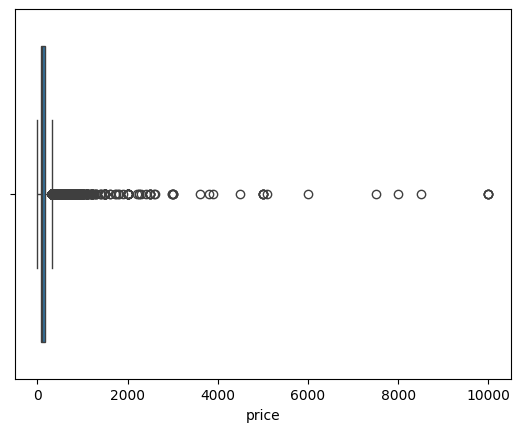

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['price'])

<Axes: xlabel='minimum_nights'>

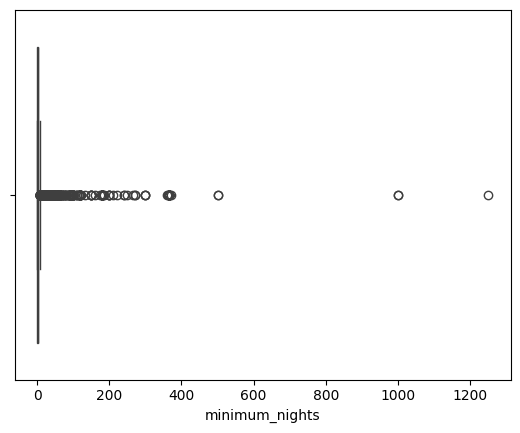

In [ ]:
sns.boxplot(x=df['minimum_nights'])

<Axes: xlabel='number_of_reviews'>

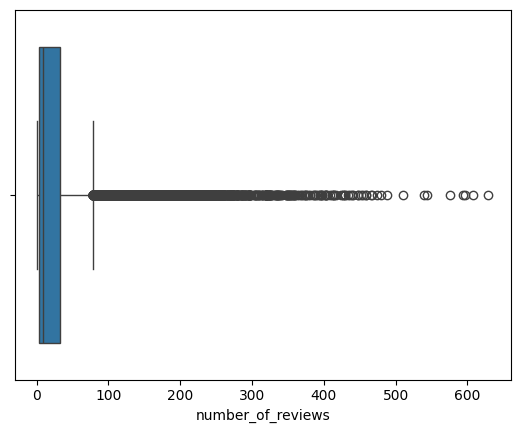

In [ ]:
sns.boxplot(x=df['number_of_reviews'])

<Axes: xlabel='reviews_per_month'>

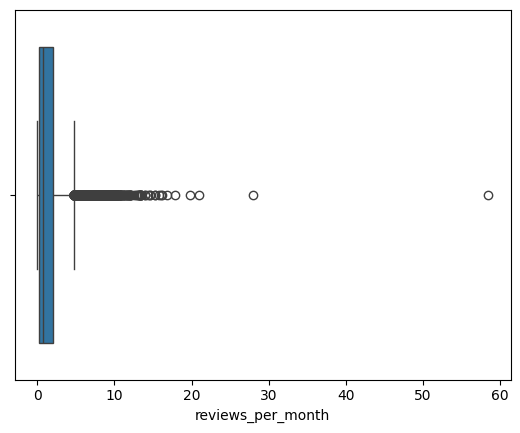

In [ ]:
sns.boxplot(x=df['reviews_per_month'])

<Axes: xlabel='calculated_host_listings_count'>

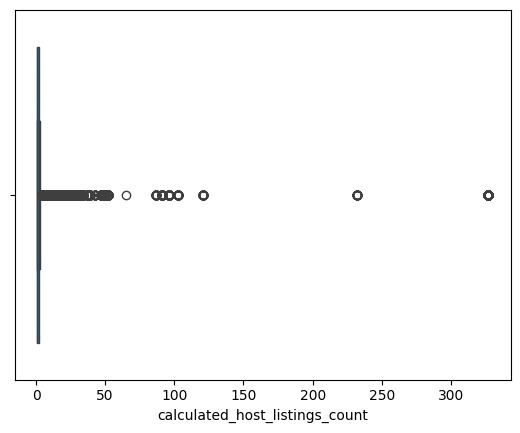

In [ ]:
sns.boxplot(x=df['calculated_host_listings_count'])

<Axes: xlabel='availability_365'>

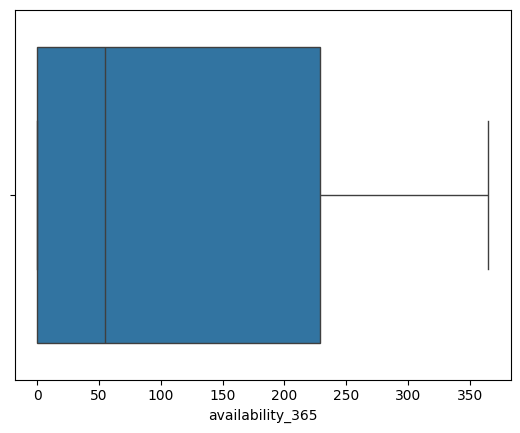

In [ ]:
sns.boxplot(x=df['availability_365'])

Price merupakan target atau label dalam model prediksi ini, maka Nilai outlier pada price bisa sangat memengaruhi model karena target yang terlalu tinggi atau terlalu rendah (outliers) dapat menyebabkan model tidak belajar pola yang benar dari data.

In [ ]:
import numpy as np

# Menghitung IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Menghapus outliers dari fitur numerik yang berpengaruh pada price
df = remove_outliers_iqr(df, 'price')
df = remove_outliers_iqr(df, 'minimum_nights')
df = remove_outliers_iqr(df, 'number_of_reviews')
df = remove_outliers_iqr(df, 'reviews_per_month')
df = remove_outliers_iqr(df, 'calculated_host_listings_count')
df = remove_outliers_iqr(df, 'availability_365')

In [ ]:
df.shape

(24139, 16)

IQR adalah teknik yang sering digunakan untuk mendeteksi outliers karena memfokuskan pada distribusi tengah data. Menangani outlier pada kategori fitur numerical tersebut karena hubungan dengan price supaya korelasinya dapat kuat.

# Transformasi Fitur

In [ ]:
df['last_review'] = pd.to_datetime(df['last_review'])
df['last_review']

,last_review
1,2019-05-21
5,2019-06-22
10,2019-06-22
20,2011-12-28
24,2019-06-19
...,...
48732,2019-07-06
48782,2019-07-07
48799,2019-07-07
48805,2019-07-07


In [ ]:
df['last_review_year'] = df['last_review'].dt.year
df['last_review_month'] = df['last_review'].dt.month

Memecah last_review menjadi last_review_year dan last_review_month memungkinkan model untuk mengenali pola apakah ada periode tertentu dalam tahun di mana listing lebih banyak di-review, yang bisa mempengaruhi harga.

In [ ]:
df.drop(['last_review'], axis=1, inplace=True)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2019,5
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129,2019,6
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6,2019,6
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,0.07,1,0,2011,12
24,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68371,-73.94028,Entire home/apt,120,2,88,0.73,2,233,2019,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24139 entries, 1 to 48852
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24139 non-null  int64  
 1   name                            24139 non-null  object 
 2   host_id                         24139 non-null  int64  
 3   host_name                       24139 non-null  object 
 4   neighbourhood_group             24139 non-null  object 
 5   neighbourhood                   24139 non-null  object 
 6   latitude                        24139 non-null  float64
 7   longitude                       24139 non-null  float64
 8   room_type                       24139 non-null  object 
 9   price                           24139 non-null  int64  
 10  minimum_nights                  24139 non-null  int64  
 11  number_of_reviews               24139 non-null  int64  
 12  reviews_per_month               24139

Proses transformasi fitur pada bagian last_review perlu dilakukan supaya dapat diproses saat melakukan modelling, kemudian juga format dari last_review (YYYY-MM-DD) ini tidak memberikan informasi langsung yang dapat dimanfaatkan oleh model prediktif.

# Univariate Analysis

Univariate EDA. Pertama, bagi fitur pada dataset menjadi dua bagian, yaitu **numerical features dan categorical features.**

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'last_review_year', 'last_review_month'],
      dtype='object')

In [ ]:
numerical_features = [
    'latitude', 'longitude', 'minimum_nights',
    'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365',
    'last_review_year', 'last_review_month', 'price'
]

categorical_features = [
    'name', 'host_name', 'neighbourhood_group',
    'neighbourhood', 'room_type'
]

print('Fitur categorical: ', categorical_features)
print('Fitur numerical: ', numerical_features)

Fitur categorical:  ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']
Fitur numerical:  ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'last_review_year', 'last_review_month', 'price']


Pada kolom id, host_id merupakan kolom yang tidak memiliki arti matematis, sehingga tidak termasuk dalam kategori numerikal.

### Categorical Features

- Visualisasi Distribusi `neighbourhood_group`:
  
    - Proses: Membuat plot untuk melihat bagaimana data didistribusikan di berbagai `neighbourhood_group`.
    - Alasan: Untuk memahami sebaran properti di berbagai wilayah utama New York City.
    - Hasil: Memberikan gambaran mengenai wilayah mana yang paling banyak atau paling sedikit digunakan dalam dataset.   

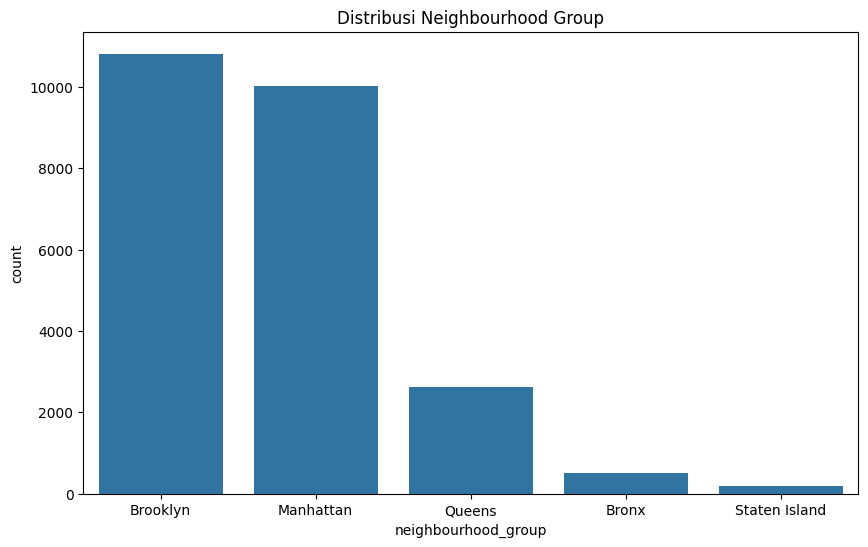

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi 'neighbourhood_group'
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title('Distribusi Neighbourhood Group')
plt.show()

Pada fitur categorical Neightbourhood Group terlihat bahwa lingkungan Brooklyn berada di urutan pertama, disusul oleh Manhattan.

- Visualisasi Distribusi `room_type`:
    - Proses: Membuat plot untuk melihat distribusi berbagai tipe kamar (`room_type`).
    - Alasan: Untuk mengetahui preferensi tipe kamar yang ditawarkan di platform Airbnb.
    - Hasil: Memahami dominasi tipe kamar tertentu dalam dataset, yang bisa mempengaruhi harga.

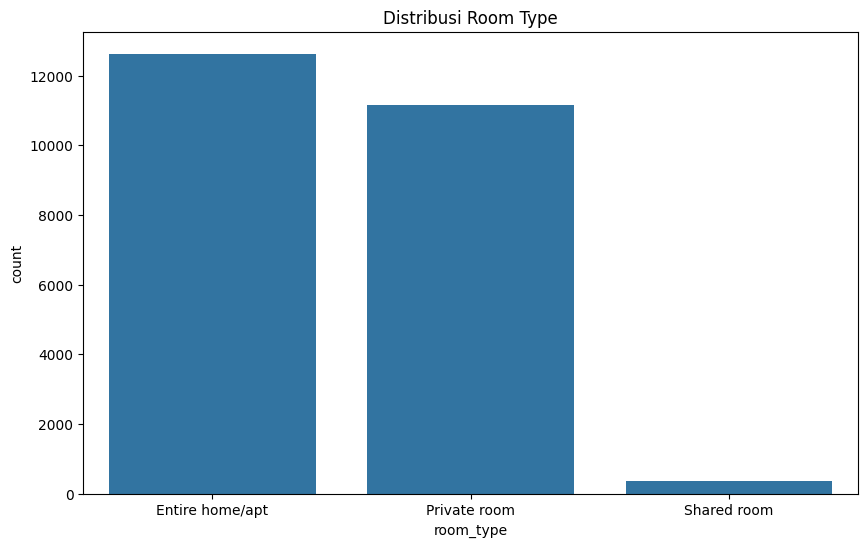

In [ ]:
# Visualisasi distribusi 'room_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='room_type', data=df, order=df['room_type'].value_counts().index)
plt.title('Distribusi Room Type')
plt.show()

Jumlah paling tinggi ada pada type room Entire home/apart.

### Numerical Features

- Visualisasi Distribusi `price`:
    - Proses: Membuat histogram atau boxplot untuk melihat distribusi harga (`price`).
    - Alasan: Untuk memahami rentang harga dan adanya outliers pada fitur `price`.
    - Hasil: Memberikan informasi mengenai sebaran harga, apakah tersebar normal atau ada anomali.

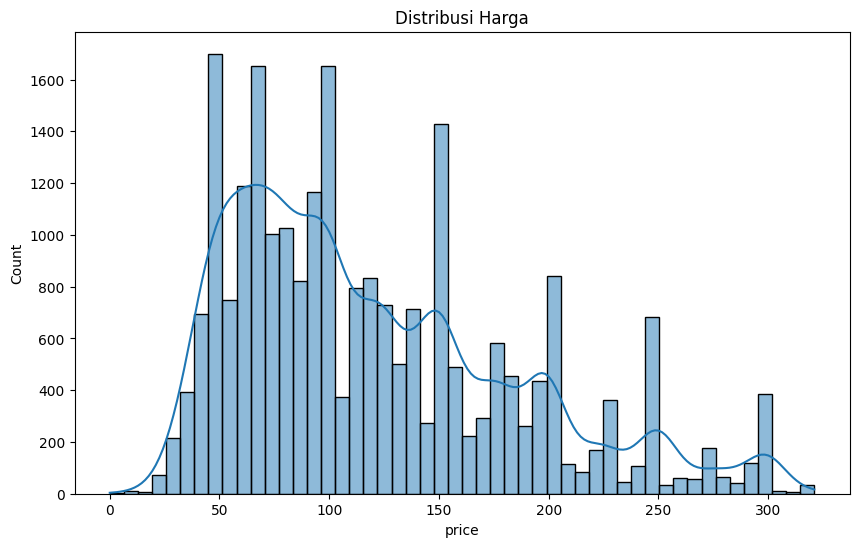

In [ ]:
# Descriptive statistics for numerical features
df.describe()

# Visualisasi distribusi 'price'
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribusi Harga')
plt.show()

 Sebagai target, visualisasi distribusi price sangat penting untuk memahami rentang harga.
 - Rentang Harga 50-150: Ini adalah rentang harga yang paling banyak diisi oleh listing. Bisa jadi ini adalah harga yang dianggap paling kompetitif atau paling terjangkau untuk para pengguna Airbnb di lokasi tersebut.
 - Jika harga jauh di atas 300, ada kemungkinan listing tersebut adalah properti premium yang sangat mahal.

- Visualisasi Distribusi `minimum_nights`:
    - Proses: Membuat histogram untuk melihat sebaran `minimum_nights`.
    - Alasan: Untuk mengetahui seberapa banyak malam minimum yang biasanya disyaratkan oleh host.
    - Hasil: Memahami pola umum dalam persyaratan minimum nights, yang mungkin berdampak pada harga.

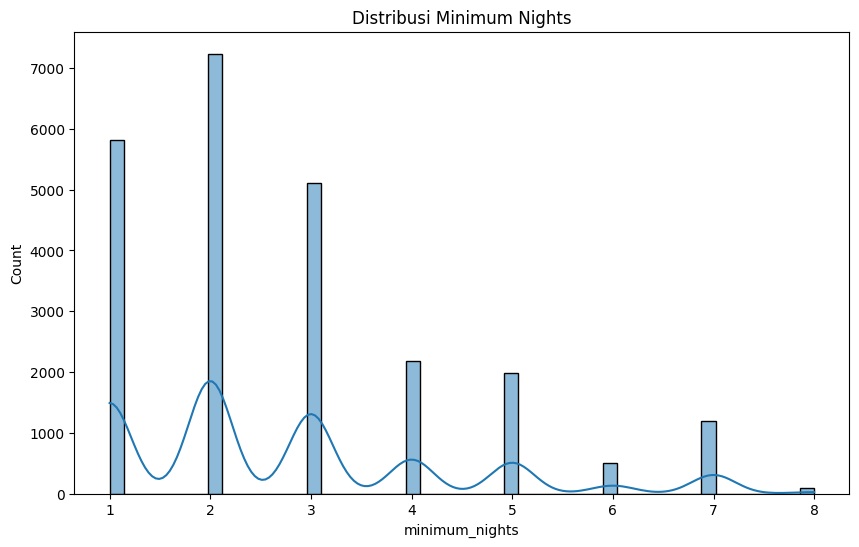

In [ ]:
# Visualisasi distribusi 'minimum_nights'
plt.figure(figsize=(10, 6))
sns.histplot(df['minimum_nights'], bins=50, kde=True)
plt.title('Distribusi Minimum Nights')
plt.show()

Visualisasi ini dapat membantu memahami pola durasi minimum yang diharapkan dari host. Terlihat bahwa minimum 2 nights adalah harapan paling tinggi yang diinginkan oleh host.

- Visualisasi Distribusi `number_of_reviews`:
    - Proses: Membuat histogram untuk melihat distribusi `number_of_reviews`.
    - Alasan: Untuk mengetahui pola ulasan yang diterima properti.
    - Hasil: Memberikan insight mengenai popularitas properti berdasarkan jumlah ulasan.

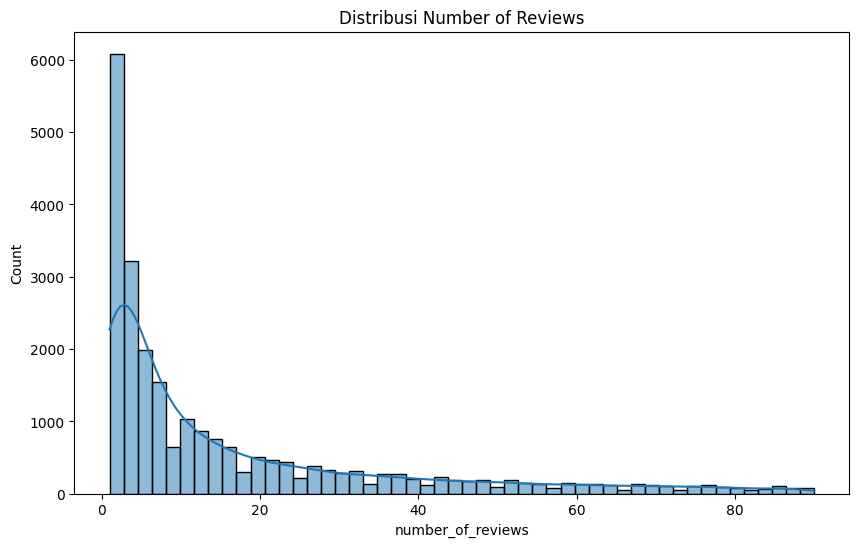

In [ ]:
# Visualisasi distribusi 'mnumber_of_reviews'
plt.figure(figsize=(10, 6))
sns.histplot(df['number_of_reviews'], bins=50, kde=True)
plt.title('Distribusi Number of Reviews')
plt.show()

Untuk melihat distribusi ulasan dan apakah ada listing dengan jumlah ulasan yang sangat tinggi.

- Visualisasi Distribusi `reviews_per_month`:
    - Proses: Membuat histogram untuk melihat sebaran `reviews_per_month`.
    - Alasan: Untuk memahami frekuensi ulasan yang diterima setiap bulannya.
    - Hasil: Mengetahui bagaimana keterlibatan pengguna dan popularitas properti dari waktu ke waktu.

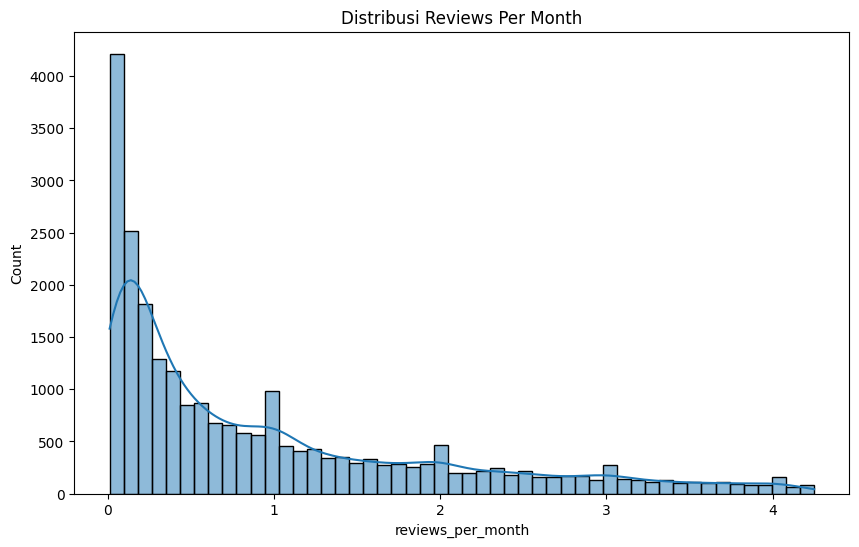

In [ ]:
# Visualisasi distribusi 'reviews_per_month'
plt.figure(figsize=(10, 6))
sns.histplot(df['reviews_per_month'], bins=50, kde=True)
plt.title('Distribusi Reviews Per Month')
plt.show()

 Ini memberikan wawasan tentang seberapa sering sebuah listing di-review dalam sebulan.

# Multivariate Analysis

Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data.

### Categorical Features

- Analisis Hubungan antara `neighbourhood_group` dan `room_type`:
    - Proses: Membuat crosstab atau plot untuk melihat hubungan antara wilayah (`neighbourhood_group`) dan tipe kamar (`room_type`).
    - Alasan: Untuk memahami apakah ada preferensi tipe kamar yang dominan di wilayah tertentu.
    - Hasil: Memberikan informasi mengenai kombinasi wilayah dan tipe kamar yang paling populer, yang bisa mempengaruhi harga.

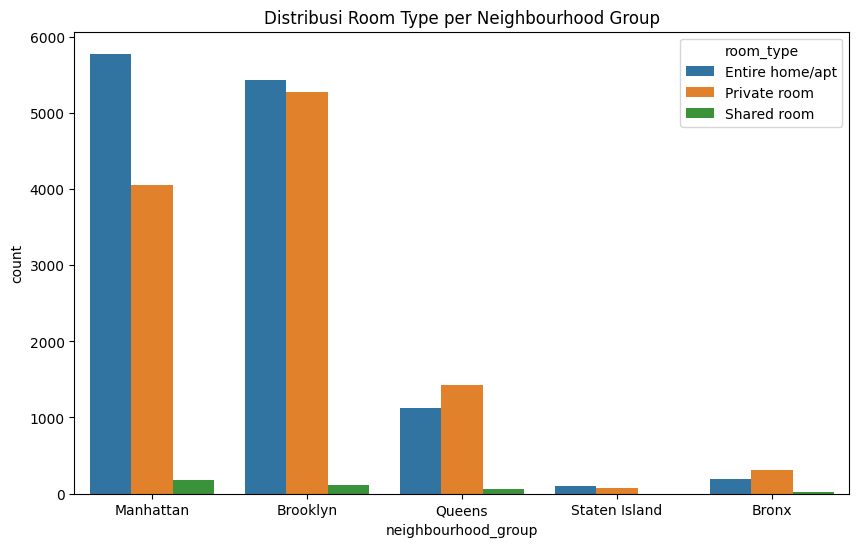

In [ ]:
# Analisis hubungan antara 'neighbourhood_group' dan 'room_type'
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df)
plt.title('Distribusi Room Type per Neighbourhood Group')
plt.show()

Menunjukkan hubungan antara Room type dengan Neightbourhood, terlihat bahwa Entire home/apart tertinggi ada pada Manhattan.

### Numerical Features

- Pairplot untuk beberapa fitur (`price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`):
    - Proses: Membuat pairplot untuk melihat hubungan antara beberapa fitur numerik.
    - Alasan: Untuk memahami korelasi dan pola antara berbagai fitur numerik.
    - Hasil: Mengetahui fitur mana yang berkorelasi kuat atau lemah dengan fitur lainnya yang penting untuk modeling.

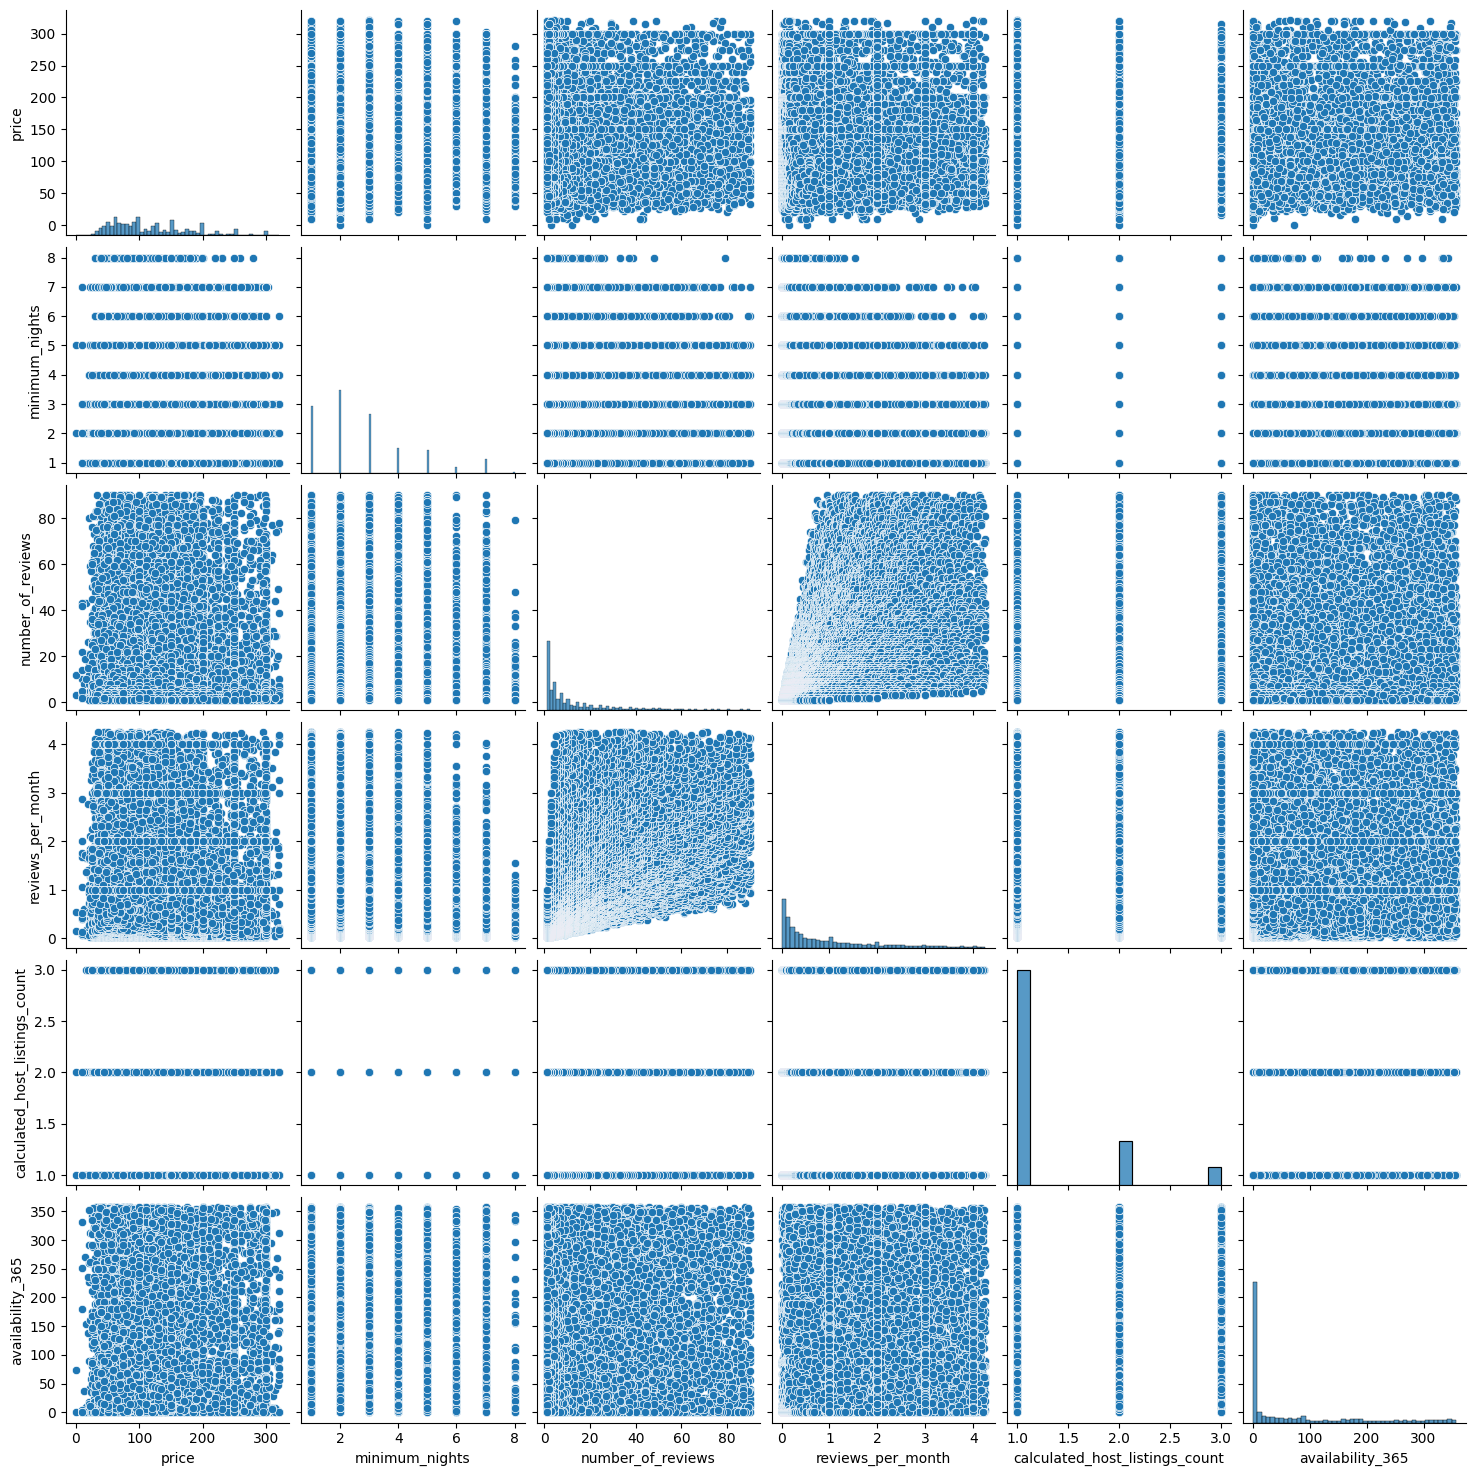

In [ ]:
sns.pairplot(df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])
plt.show()

Pada visualisasi price dengan numerical yang lain (yang telah dioutlier) memiliki korelasi yang dapat dilihat.

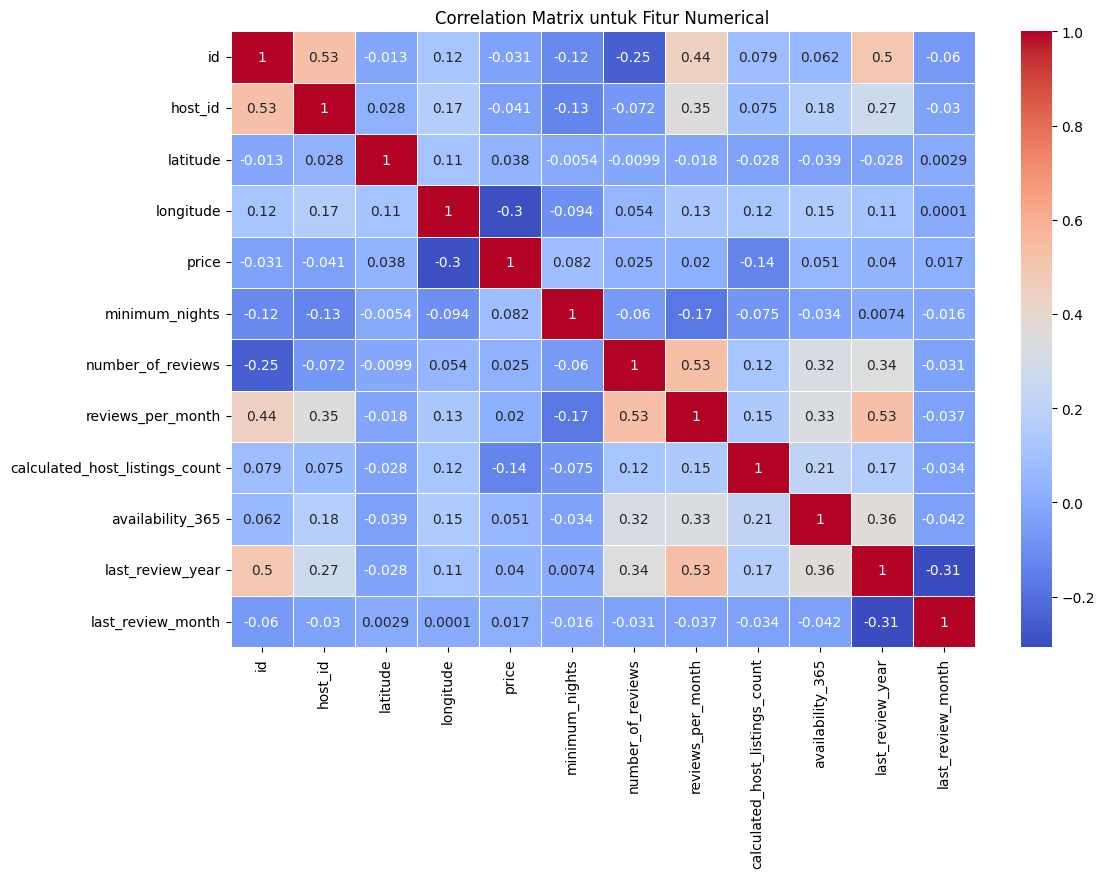

In [ ]:
numeric_df = df.select_dtypes(include=['float', 'int'])

corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix untuk Fitur Numerical')
plt.show()

- Correlation Matrix untuk Fitur Numerical:
    - Proses: Membuat matriks korelasi untuk mengevaluasi hubungan antar fitur numerik.
    - Alasan: Untuk memahami seberapa kuat hubungan antar fitur, yang bisa membantu dalam seleksi fitur.
    - Hasil: Menentukan fitur mana yang memiliki hubungan linier kuat, yang bisa berdampak pada performa model.

# Data Preparation

### Encoding Fitur Kategori

**Encoding Fitur**: One-hot encoding dilakukan untuk mengubah fitur kategorikal seperti `neighbourhood_group`, `neighbourhood`, dan `room_type` menjadi format numerik yang dapat digunakan oleh algoritma machine learning. Ini penting karena sebagian besar algoritma tidak dapat bekerja dengan data kategorikal secara langsung.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df_encoded = pd.get_dummies(df, columns=['neighbourhood_group', 'neighbourhood', 'room_type'], drop_first=True)

df_encoded = df_encoded.drop(columns=['name', 'host_name'])

In [ ]:
df_encoded.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_Whitestone,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355,...,False,False,False,False,False,False,False,False,False,False
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129,...,False,False,False,False,False,False,False,False,False,False
10,5295,7702,40.80316,-73.96545,135,5,53,0.43,1,6,...,False,False,False,False,False,False,False,False,False,False
20,7801,21207,40.71842,-73.95718,299,3,9,0.07,1,0,...,False,False,True,False,False,False,False,False,False,False
24,8490,25183,40.68371,-73.94028,120,2,88,0.73,2,233,...,False,False,False,False,False,False,False,False,False,False


# Train-test-split

 **Splitting**: Melakukan pembagian data menjadi 90:10, yang mana 90% untuk train dan 10% untuk test. Dataset ini tergolong dalam kategori dataset yang berukuran besar, maka pembagian menggunakan perbandingan 90:10.

In [ ]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

# Standarisasi

**Standarisasi**: Membantu membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma. Dalam Standarisasi menggunakan model `StandardScaler` yang ditemukan dari library `sklearn`. Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [ ]:
scaler = StandardScaler()
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns

# Standarisasi pada X_train dan X_test
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_train[numerical_features].head()

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
13586,-0.804717,-0.243898,1.357429,-0.257173,-1.064932,-0.761211,-0.903137,-0.496817,-0.677973
4044,-1.546209,-0.731023,-0.197221,0.214814,-0.455570,1.039168,-0.332230,1.239287,-0.677973
2503,-1.671273,-0.789523,-0.367706,-1.315615,1.372516,0.065990,-0.641874,-0.496817,1.000208
7060,-1.300416,-0.784888,1.805716,0.181361,0.763154,0.601238,-0.390288,-0.496817,-0.612346
29872,0.446364,1.334853,-0.161509,-0.720056,0.763154,0.309285,1.293406,-0.496817,0.278309


In [ ]:
X_train[numerical_features].describe().round(4)

,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21725.0000,21725.0000,21725.0000,21725.0000,21725.0000,21725.0000,21725.0000,21725.0000,21725.0000
mean,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.7960,-0.8256,-3.9737,-6.6570,-1.0649,-0.7612,-0.9128,-0.4968,-0.6780
25%,-0.8620,-0.7265,-0.7037,-0.6623,-0.4556,-0.7126,-0.7773,-0.4968,-0.6780
50%,0.0795,-0.4619,-0.1455,-0.0549,-0.4556,-0.4693,-0.4096,-0.4968,-0.6217
75%,0.8567,0.3672,0.6387,0.3493,0.1538,0.3093,0.4709,-0.4968,0.3814
max,1.7605,3.0096,3.3110,5.4369,3.2006,3.5694,3.1900,2.9754,2.6690


# Model Deployment

### Model Deployment

In [ ]:
from sklearn.metrics import mean_squared_error
import pandas as pd

#Melakukan inisialisasi model yang akan dilatih
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### Model Deployment dengan KNN

1. **K-Nearest Neighbor (KNN)**:
Algoritma ini dipilih karena kemampuannya dalam menangani data non-linear dan memberikan prediksi yang baik pada dataset kecil hingga menengah.
   - **Proses**: Mencoba beberapa nilai `k` untuk menemukan k terbaik yang memberikan error paling kecil.
   - **Parameters**:
     - n_neighbors: Jumlah tetangga terdekat yang digunakan untuk prediksi `[5, 10, 15, 20].`
     - weights: Metode pembobotan jarak, apakah akan menggunakan uniform (setiap tetangga memiliki bobot yang sama) atau distance (tetangga yang lebih dekat memiliki bobot lebih besar) `['uniform', 'distance']`
     - p: Menentukan jenis jarak yang digunakan, `p=1` untuk jarak Manhattan dan `p=2` untuk jarak Euclidean.
   - **GridSearchCV**:
   Digunakan untuk menemukan kombinasi parameter terbaik berdasarkan Mean Squared Error (MSE) yang negatif sebagai metrik evaluasi. Setelah melakukan pencarian, model terbaik disimpan sebagai best_knn

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan, p=2 for Euclidean
}

# Inisialisasi GridSearchCV untuk KNN
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_knn.fit(X_train, y_train)

# Evaluasi performa terbaik
best_knn = grid_knn.best_estimator_
print(f"Best parameters for KNN: {grid_knn.best_params_}")

Best parameters for KNN: {'n_neighbors': 20, 'p': 1, 'weights': 'distance'}


### Model Deployment dengan Random Forest

2. **Random Forest**:
Algoritma ensemble yang terdiri dari banyak pohon keputusan, mampu menangani data dengan kompleksitas tinggi dan variabel penting.
   - **Proses**: Melakukan GridSearchCV untuk mencari hyperparameter optimal.
   - **Parameters**:
     - n_estimators: Jumlah pohon yang digunakan dalam ensemble `[50, 100, 200]`.
     - max_depth: Kedalaman maksimum setiap pohon, yang mempengaruhi seberapa detail pohon tersebut dalam membagi data `[None, 10, 20, 30]`.
     - min_samples_split: Jumlah minimum sampel yang diperlukan untuk membagi node.
     - min_samples_leaf: Jumlah minimum sampel yang harus dimiliki oleh leaf node.
     - max_features: Jumlah maksimum fitur yang dipertimbangkan untuk split di setiap node.
     - bootstrap: Menentukan apakah sampel bootstrap akan digunakan saat membangun pohon.
     
   - **GridSearchCV**:
     Digunakan untuk mengoptimalkan parameter dan memilih model terbaik (best_rf).

In [ ]:
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True, False]
}

# Inisialisasi GridSearchCV untuk RandomForest
grid_rf = GridSearchCV(RandomForestRegressor(random_state=55), param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Evaluasi performa terbaik
best_rf = grid_rf.best_estimator_
print(f"Best parameters for Random Forest: {grid_rf.best_params_}")

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for Random Forest: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


### Model Deployment dengan Boosting

3. **AdaBoost**:
Algoritma boosting yang bertujuan untuk meningkatkan kinerja model dengan fokus pada kesalahan yang dibuat oleh model sebelumnya.
   - Proses: Menggunakan GridSearchCV untuk mencari hyperparameter optimal dengan `learning_rate` 0.1 dan `random_state` 55.
   - **Parameters**:
     - n_estimators: Jumlah estimator yang digunakan dalam boosting `[50, 100, 150]`.
     - learning_rate: Mengontrol kontribusi setiap estimator terhadap model akhir `[0.01, 0.1, 1.0]`.
   - **GridSearchCV**:
     Digunakan untuk menemukan parameter optimal dan menentukan model terbaik (best_boost).

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

param_grid_boost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0]
}

# Inisialisasi GridSearchCV untuk AdaBoost
grid_boost = GridSearchCV(AdaBoostRegressor(random_state=55), param_grid_boost, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_boost.fit(X_train, y_train)

# Evaluasi performa terbaik
best_boost = grid_boost.best_estimator_
print(f"Best parameters for Boosting: {grid_boost.best_params_}")

Best parameters for Boosting: {'learning_rate': 0.05, 'n_estimators': 50}


# Evaluasi Model

Metrik evaluasi yang digunakan untuk mengukur kinerja model adalah Mean Squared Error (MSE). MSE adalah metrik yang menghitung rata-rata dari kuadrat selisih antara nilai prediksi dan nilai aktual. MSE digunakan untuk mengukur seberapa baik model regresi dalam memprediksi nilai numerik, di mana semakin kecil nilai MSE, semakin baik model dalam memprediksi data.

In [ ]:
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting'])

model_dict = {'KNN': best_knn, 'RandomForest': best_rf, 'Boosting': best_boost}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)) / 1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)) / 1e3

print(mse)

                 train      test
KNN                0.0  2.341269
RandomForest   0.67473  1.942955
Boosting      2.226237  2.240535


#### Analisis Hasil:
   * KNN: Model KNN memiliki MSE yang sangat rendah pada data pelatihan, yang berarti model hampir sempurna dalam memprediksi data yang dilatihkan. Namun, MSE pada data pengujian cukup tinggi (2.341), menunjukkan bahwa model ini mungkin mengalami overfitting. KNN tampaknya sangat cocok untuk data pelatihan, tetapi kurang mampu menggeneralisasi pada data baru.

   * Random Forest: Random Forest menunjukkan keseimbangan yang baik antara MSE pada data pelatihan dan pengujian. MSE pada data pelatihan (0.675) dan pengujian (1.943) keduanya relatif rendah, menunjukkan bahwa model ini mampu menangkap pola dalam data tanpa overfitting. Random Forest terbukti sebagai model yang lebih stabil dan dapat diandalkan dibandingkan KNN dan Boosting dalam konteks ini.

   * Boosting: Model Boosting memiliki MSE yang cukup tinggi pada data pelatihan (2.226) dan pengujian (2.240). Ini menunjukkan bahwa model Boosting tidak sebaik Random Forest dalam mempelajari pola dari data, dan kemampuannya untuk memprediksi pada data baru tidak seoptimal model Random Forest. Model ini mungkin terlalu sederhana untuk menangkap kompleksitas dalam data atau membutuhkan tuning lebih lanjut.

#### Prediksi Hasil
**Prediksi KNN: 107.8**
- Model ini memberikan prediksi yang paling mendekati nilai aktual (107.8), meskipun MSE pada data pengujian lebih tinggi dibandingkan Random Forest. Hal ini menunjukkan bahwa meskipun KNN tampaknya memiliki hasil yang baik dalam kasus ini, performanya secara keseluruhan kurang konsisten.

**Prediksi RF: 113.2**
- Prediksi Random Forest adalah 113.2, yang sedikit lebih tinggi dari prediksi KNN tetapi masih dalam kisaran yang wajar. Dengan MSE yang lebih rendah pada data pengujian, Random Forest tampaknya lebih dapat diandalkan dalam memprediksi harga properti secara umum.

**Prediksi Boosting: 147.6**
- Model Boosting memberikan prediksi yang jauh lebih tinggi dari nilai aktual (147.6). Hal ini menunjukkan bahwa model ini mungkin kurang cocok untuk dataset ini, dan memiliki kesalahan prediksi yang lebih besar dibandingkan kedua model lainnya.

In [ ]:
# Prediksi untuk data sampel
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true': y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RandomForest,prediksi_Boosting
29909,100,107.8,113.2,147.6


#### Kesimpulan Analisis:
   Random Forest sebagai model yang paling handal dalam memprediksi harga properti Airbnb. Meskipun prediksinya sedikit lebih tinggi dari nilai aktual, performa keseluruhan pada data pengujian menunjukkan bahwa model ini lebih stabil dan akurat dibandingkan KNN dan Boosting. KNN, meskipun memberikan prediksi yang paling dekat dalam kasus ini, menunjukkan tanda-tanda overfitting, sementara Boosting memerlukan peningkatan lebih lanjut agar dapat memberikan hasil yang lebih akurat.